# Assignment-7

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
df = pd.read_csv("World-Stock-Prices-Dataset.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2023-09-20 00:00:00-04:00,4.840000,4.910000,4.630000,4.670000,7441900.0,0.0,0.0,peloton,PTON,fitness,usa
1,2023-09-20 00:00:00-04:00,397.049988,397.989990,386.119995,386.299988,3866600.0,0.0,0.0,netflix,NFLX,entertainment,usa
2,2023-09-20 00:00:00-04:00,564.349976,569.219971,562.659973,563.830017,1311500.0,0.0,0.0,costco,COST,retail,usa
3,2023-09-20 00:00:00-04:00,138.550003,139.369995,135.199997,135.289993,46263700.0,0.0,0.0,amazon,AMZN,e-commerce,usa
4,2023-09-20 00:00:00-04:00,179.259995,179.699997,175.399994,175.490005,58436200.0,0.0,0.0,apple,AAPL,technology,usa


# Data Preprocessing

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Brand_Name', 'Ticker', 'Industry_Tag', 'Country'],
      dtype='object')

In [6]:
df.shape

(279753, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279753 entries, 0 to 279752
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          279753 non-null  object 
 1   Open          279753 non-null  float64
 2   High          279753 non-null  float64
 3   Low           279753 non-null  float64
 4   Close         279753 non-null  float64
 5   Volume        279753 non-null  float64
 6   Dividends     279753 non-null  float64
 7   Stock Splits  279753 non-null  float64
 8   Brand_Name    279753 non-null  object 
 9   Ticker        279753 non-null  object 
 10  Industry_Tag  279753 non-null  object 
 11  Country       279753 non-null  object 
dtypes: float64(7), object(5)
memory usage: 25.6+ MB


In [8]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,279753.000000,279753.000000,279753.000000,279753.000000,2.797530e+05,279753.000000,279753.000000
mean,65.162445,65.914283,64.389596,65.167955,2.349103e+07,0.003406,0.000751
std,117.203158,118.573147,115.772027,117.190963,8.864361e+07,0.062041,0.073979
min,0.196890,0.199922,0.192798,0.198861,0.000000e+00,0.000000,0.000000
25%,15.049936,15.253301,14.837500,15.050000,1.350600e+06,0.000000,0.000000
50%,32.329837,32.712338,31.923977,32.330002,4.630800e+06,0.000000,0.000000
75%,72.318681,72.980003,71.635438,72.348923,1.238360e+07,0.000000,0.000000
max,2165.010010,2175.010010,2138.050049,2153.199951,7.421641e+09,10.000000,20.000000


In [9]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
Brand_Name       object
Ticker           object
Industry_Tag     object
Country          object
dtype: object

# Checking null values

In [10]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
dtype: int64

In [11]:
df.duplicated().sum()

0

# Changing datatype

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
df.dtypes

Date            datetime64[ns, UTC]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume                      float64
Dividends                   float64
Stock Splits                float64
Brand_Name                   object
Ticker                       object
Industry_Tag                 object
Country                      object
dtype: object

# Line charts to visualize historical stock price trends

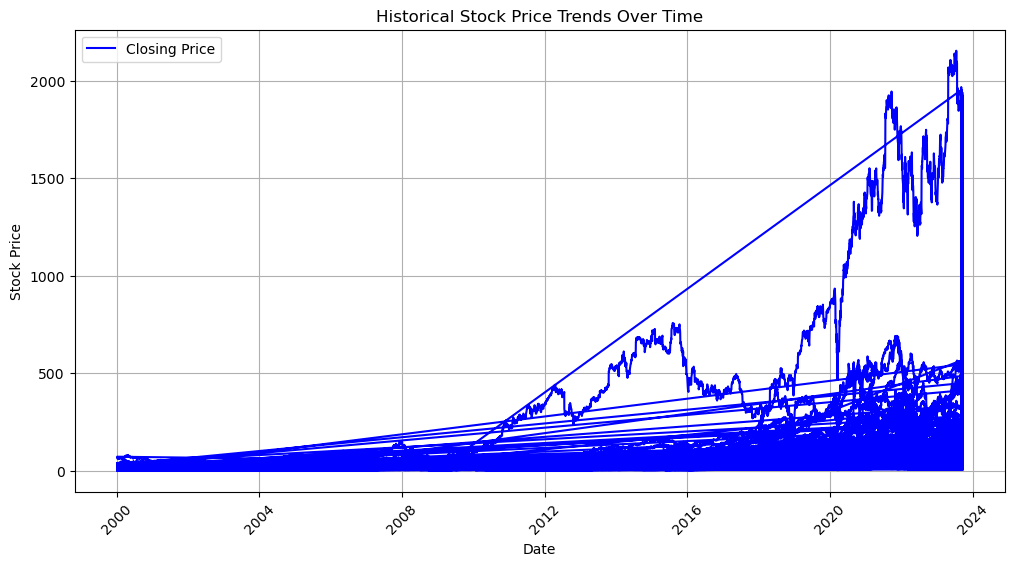

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='b')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Historical Stock Price Trends Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot moving averages to identify trends and smooth noise

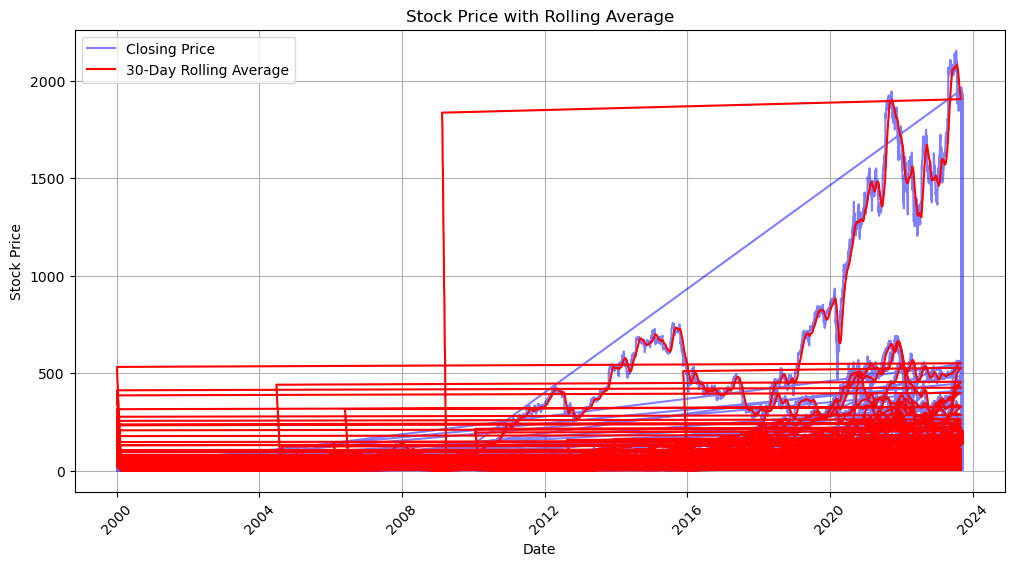

In [14]:
window_size = 30  # You can adjust the window size as needed
rolling_average = df['Close'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='b', alpha=0.5)
plt.plot(df['Date'], rolling_average, label=f'{window_size}-Day Rolling Average', color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price with Rolling Average')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


# Seasonality analysis using seasonal decomposition

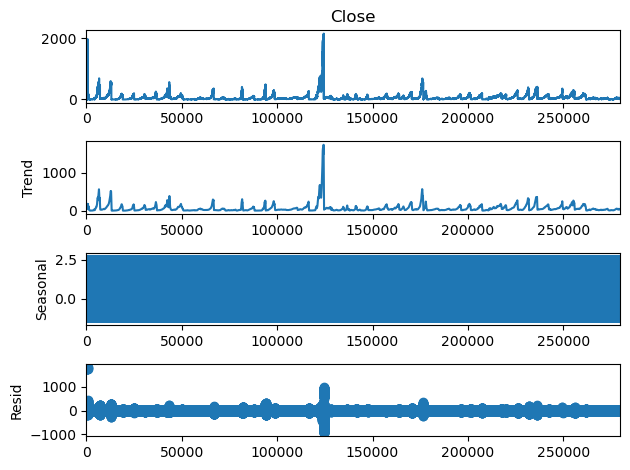

In [15]:
result = seasonal_decompose(df['Close'], model='additive', period=252)  # Assuming annual seasonality (252 trading days)
result.plot()
plt.show()

# Analyze and plot correlation with other variables

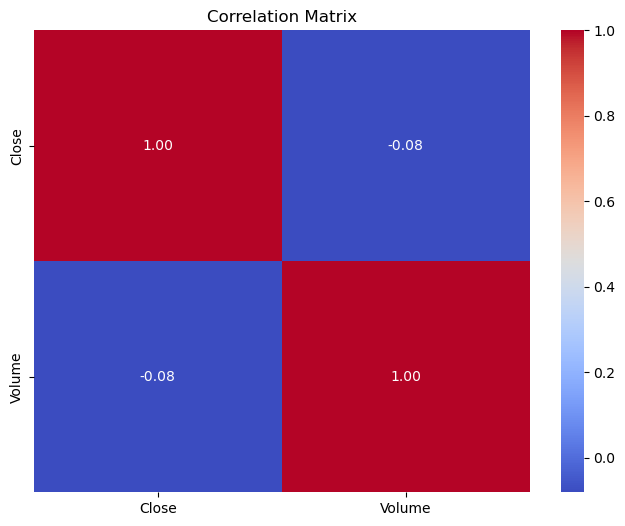

In [16]:
correlation_matrix = df[['Close', 'Volume']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Split the data into training and testing sets (e.g., 80% training, 20% testing)

In [18]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Build an ARIMA model

In [19]:
# Example ARIMA(1, 1, 1) model
arima_model = ARIMA(train_data['Close'], order=(1, 1, 1))
arima_result = arima_model.fit()


# Forecast future stock prices using ARIMA model

In [20]:
forecast_steps = len(test_data)
arima_forecast = arima_result.forecast(steps=forecast_steps)

# Plot the original data and the ARIMA forecast

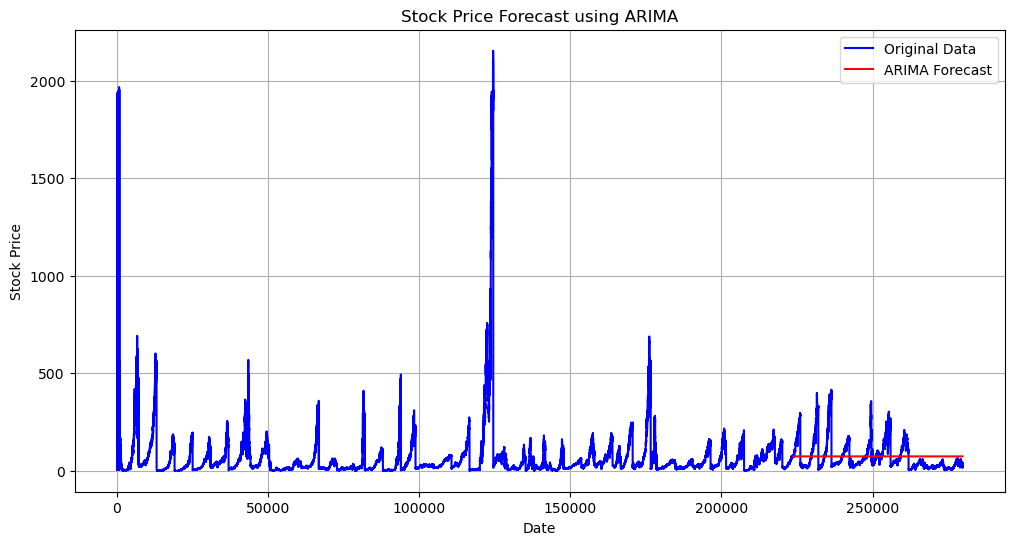

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Original Data', color='b')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Forecast using ARIMA')
plt.legend()
plt.grid(True)
plt.show()

# Build an Exponential Smoothing model

In [22]:
exp_smoothing_model = ExponentialSmoothing(train_data['Close'], seasonal='add', seasonal_periods=252)  # Assuming annual seasonality
exp_smoothing_result = exp_smoothing_model.fit()

# Forecast future stock prices using Exponential Smoothing model

In [23]:
exp_smoothing_forecast = exp_smoothing_result.forecast(steps=forecast_steps)

# Plot the original data and the Exponential Smoothing forecast

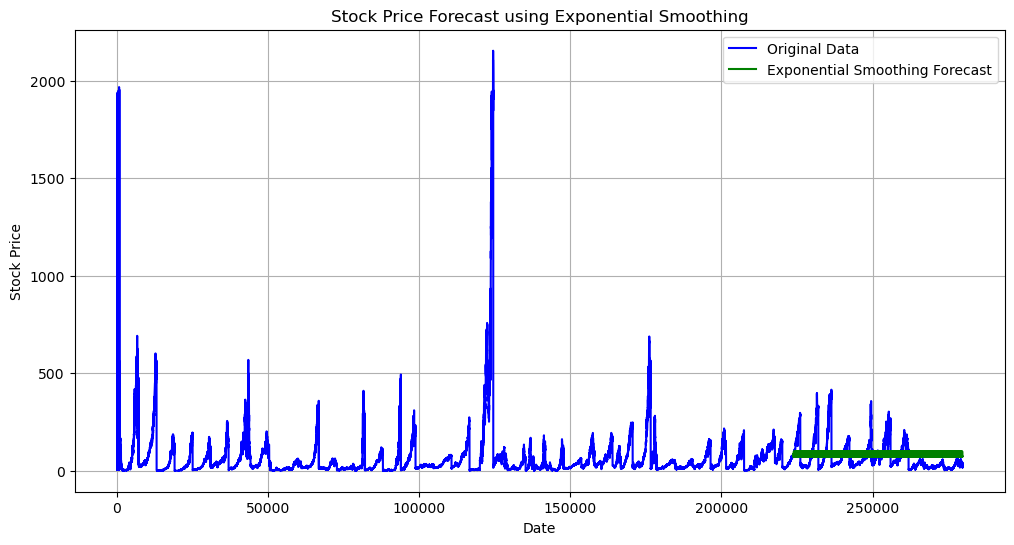

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Original Data', color='b')
plt.plot(test_data.index, exp_smoothing_forecast, label='Exponential Smoothing Forecast', color='g')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Forecast using Exponential Smoothing')
plt.legend()
plt.grid(True)
plt.show()